In [1]:
from conf import databases, url, data_dir, beat_annotations
from file_utils import create_folder
from prepostproc import build_dataset, transform_example

fs = 128
fs_target = 360
min_bpm = 10
max_bpm = 350
min_gap = fs*60/min_bpm
max_gap = fs*60/max_bpm

train_perc = 99
test_perc = 100 - train_perc

params = {
    'fs_target': 360,
    'segment_size': 5000, 
    'segment_step': 2500, 
    'normalize_steps': True,
    'correct_peaks': True,
    'left_border': 50, # samples
    'right_border': 50, # samples
    'min_gap': min_gap,
    'max_gap': max_gap,
    'beats': beat_annotations
}

build_dataset(data_dir, databases, params, pool_size=4)
# transform_example(data_dir, 'afdb', '04015', params)

mitdb 100 transformed!
mitdb 101 transformed!
mitdb 102 transformed!
mitdb 103 transformed!
mitdb 104 transformed!
mitdb 105 transformed!
mitdb 106 transformed!
mitdb 107 transformed!
mitdb 108 transformed!
mitdb 109 transformed!
mitdb 111 transformed!
mitdb 112 transformed!
mitdb 113 transformed!
mitdb 114 transformed!
mitdb 115 transformed!
mitdb 116 transformed!
mitdb 117 transformed!
mitdb 118 transformed!
mitdb 119 transformed!
mitdb 121 transformed!
mitdb 122 transformed!
mitdb 123 transformed!
mitdb 124 transformed!
mitdb 200 transformed!
mitdb 201 transformed!
mitdb 202 transformed!
mitdb 203 transformed!
mitdb 205 transformed!
mitdb 207 transformed!
mitdb 208 transformed!
mitdb 209 transformed!
mitdb 210 transformed!
mitdb 212 transformed!
mitdb 213 transformed!
svdb 801 transformed!
mitdb 214 transformed!
svdb 802 transformed!
mitdb 215 transformed!
svdb 806 transformed!
mitdb 217 transformed!
svdb 807 transformed!
mitdb 219 transformed!
svdb 808 transformed!
svdb 811 transfo

AssertionError: 

In [2]:
zeros = 0
ones = 0
for db, ids in databases:
    for i in ids:
        x, y = load_example(db, i, 360)
        assert len(x) == len(y)
        zeros += numpy.where(y==0.)[0].shape[0]
        ones += numpy.where(y==1.)[0].shape[0]
print(zeros, ones)

309458683 897007


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time 

XY = load_steps('edb', 'e0304', 360, 5000, 2500, True, True)


plt.figure(figsize=(20, 10))
l = 0
u = 100

x = numpy.reshape(XY[l:u, 0], ((u-l)*5000,))
find_peaks(x)
yw = numpy.where(numpy.reshape(XY[l:u, 1], ((u-l)*5000,))==1)[0]
y = x[yw]
plt.plot(x)
plt.plot(yw, y, 'r+')
# plt.plot(numpy.reshape(XY[l:u, 1], ((u-l)*5000,)))
# plt.plot(x[:2000])
# plt.plot(y[:2000])
plt.show()

NameError: name 'load_steps' is not defined

In [58]:
import wfdb

f = 'data/nsrdb/18177'

#record = wfdb.rdsamp(f)
sig, fields = wfdb.srdsamp(f)
ann = wfdb.rdann(f, 'atr')
print(sig.shape)

(11960320, 2)


In [128]:
kk = {}
cc = {}

for i in range(len(ann.chan)):
    idx = ann.annsamp[i]
    chan = ann.chan[i]
    if idx not in kk:
        kk[idx] = set()
    kk[idx].add(chan)
    if chan not in cc:
        cc[chan] = 1
    else:
        cc[chan] += 1

print(cc)
for k, v in kk.items():
    if len(list(v)) > 1:
        print(k, v)
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import colorsys

print(len(numpy.where(numpy.unique(ann.annsamp, return_counts=True)[1]>1)[0]))

def get_colors(n):
    HSV_tuples = [(x*1.0/n, 0.5, 0.5) for x in range(n)]
    RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
    return list(RGB_tuples)

# chans = list(set(ann.chan))
# colors = get_colors(len(chans))
# color_mapping = {a:b for (a,b) in zip(chans, colors)}

# mapping = {}
# plt.figure(figsize=(20, 5), dpi=900)
# for i in range(10000):
#     samp = ann.annsamp[i]
#     chan = ann.chan[i]
#     color = color_mapping[chan]
#     if samp in mapping:
#         plt_idx = mapping[samp]
#         print(samp)
#     else:
#         mapping[samp] = i
#         plt_idx = i
#     plt.plot(plt_idx, chans.index(ann.chan[i]), '.', c=[*color])
# plt.show()


# for i, c in enumerate(colors):
#     plt.plot(i, 1, 's', c=[*c, 1], markersize=125)
# plt.show()
# print(colors)
# for idx in numpy.where(ann.chan==2)[0]:

# for idx in numpy.where(ann.chan==2)[0]:
#     annidx = ann.annsamp[idx]
#     print(idx, annidx, ann.anntype[idx])
#     for i in range(sig.shape[1]):
#         plt.figure(figsize=(20, 5))
#         plt.plot(sig[annidx-500:annidx+500, i])
#         plt.plot([500, 500], [-2, -1], 'r-')
#         print('l:', len(numpy.where(numpy.logical_and(annidx-500<=ann.annsamp, ann.annsamp<=annidx+500))[0]))
#         for odx in numpy.where(numpy.logical_and(annidx-500<=ann.annsamp, ann.annsamp<=annidx+500))[0]:
# #             chan = ann.chan[odx]
#             annodx = ann.annsamp[odx]
#             print(odx, annodx, ann.anntype[odx])
#             plt.plot([annodx-annidx+500, annodx-annidx+500], [-1, 0], 'g-')
            
        
#         plt.show()


{16: 24418, 0: 26870, 2: 63748, 34: 15, 1: 205, 32: 89, 17: 484, 33: 20, 18: 1155}
0


In [131]:
from conf import databases
for db, ids in databases:
    print(db)
    for i in ids:
        f = 'data/' + db + '/' + i
        sig, fields = wfdb.srdsamp(f)
        ann = wfdb.rdann(f, 'atr')

        kk = {}
        cc = {}

        for j in range(len(ann.chan)):
            idx = ann.annsamp[j]
            chan = ann.chan[j]
            if idx not in kk:
                kk[idx] = set()
            kk[idx].add(chan)
            if chan not in cc:
                cc[chan] = 1
            else:
                cc[chan] += 1
        tot = sum([v for k, v in cc.items()])
        l_diff_annsamp = len(numpy.where(numpy.unique(ann.annsamp, return_counts=True)[1]>1)[0])
        print('  - {}\t | tot: {}\t | channels: {}\t | annsamp: {}'.format(i, tot, cc, l_diff_annsamp))

mitdb
  - 100	 | tot: 2274	 | channels: {0: 2274}	 | annsamp: 0
  - 101	 | tot: 1874	 | channels: {0: 1874}	 | annsamp: 0
  - 102	 | tot: 2192	 | channels: {0: 2192}	 | annsamp: 0
  - 103	 | tot: 2091	 | channels: {0: 2091}	 | annsamp: 0
  - 104	 | tot: 2311	 | channels: {0: 2311}	 | annsamp: 0
  - 105	 | tot: 2691	 | channels: {0: 2691}	 | annsamp: 0
  - 106	 | tot: 2098	 | channels: {0: 2098}	 | annsamp: 0
  - 107	 | tot: 2140	 | channels: {0: 2140}	 | annsamp: 0
  - 108	 | tot: 1824	 | channels: {0: 1824}	 | annsamp: 0
  - 109	 | tot: 2535	 | channels: {0: 2535}	 | annsamp: 0
  - 111	 | tot: 2133	 | channels: {0: 2133}	 | annsamp: 0
  - 112	 | tot: 2550	 | channels: {0: 2550}	 | annsamp: 0
  - 113	 | tot: 1796	 | channels: {0: 1796}	 | annsamp: 0
  - 114	 | tot: 1890	 | channels: {0: 1890}	 | annsamp: 0
  - 115	 | tot: 1962	 | channels: {0: 1962}	 | annsamp: 0
  - 116	 | tot: 2421	 | channels: {0: 2421}	 | annsamp: 0
  - 117	 | tot: 1539	 | channels: {0: 1539}	 | annsamp: 0
  - 118	

In [147]:
from conf import beat_annotations
print(len(ann.anntype))
print(numpy.where(numpy.in1d(ann.anntype, beat_annotations))[0])

757
[  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 25

['ECG', 'ECG'] (array([38997], dtype=int64),)
['ECG', 'ECG'] (array([44427], dtype=int64),)
['ECG', 'ECG'] (array([30247], dtype=int64),)
['ECG', 'ECG'] (array([44478], dtype=int64),)
['ECG', 'ECG'] (array([46105], dtype=int64),)
['ECG', 'ECG'] (array([43571], dtype=int64),)
['ECG', 'ECG'] (array([40203], dtype=int64),)
['ECG', 'ECG'] (array([45359], dtype=int64),)
['ECG', 'ECG'] (array([40175], dtype=int64),)
['ECG', 'ECG'] (array([38648], dtype=int64),)
['ECG', 'ECG'] (array([47832], dtype=int64),)
['ECG', 'ECG'] (array([69712], dtype=int64),)
['ECG', 'ECG'] (array([46686], dtype=int64),)
['ECG', 'ECG'] (array([32698], dtype=int64),)
['ECG', 'ECG'] (array([47293], dtype=int64),)
['ECG', 'ECG'] (array([44873], dtype=int64),)
['ECG', 'ECG'] (array([43725], dtype=int64),)
['ECG', 'ECG'] (array([55016], dtype=int64),)
['ECG', 'ECG'] (array([42061], dtype=int64),)
['ECG', 'ECG'] (array([44628], dtype=int64),)
['ECG', 'ECG'] (array([42704], dtype=int64),)
['ECG', 'ECG'] (array([45020], dty

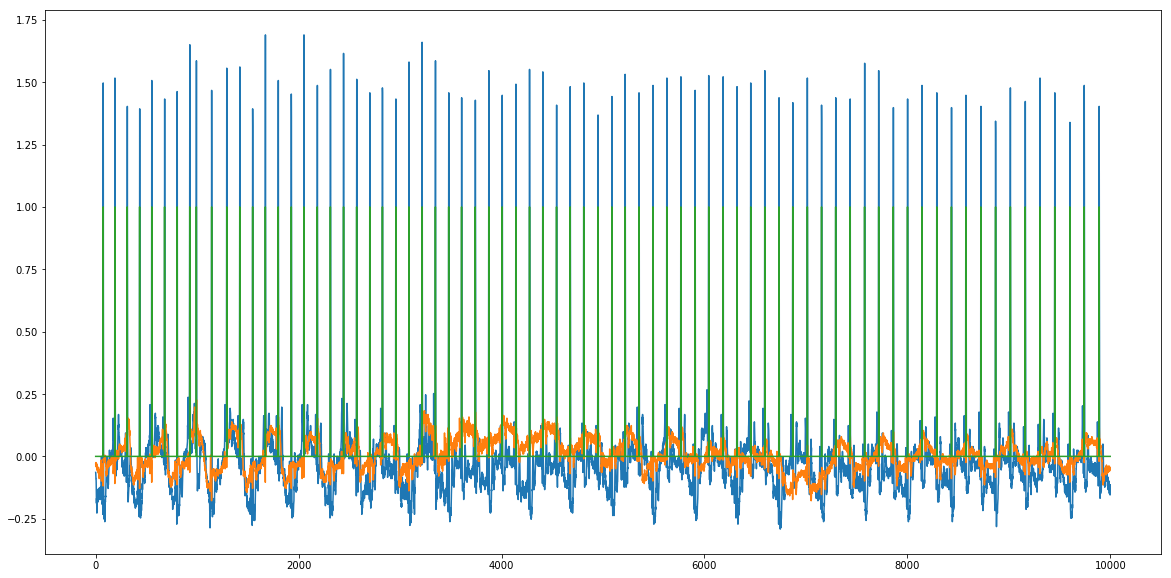

In [35]:
t = 'data/sddb/49'

for f in ["00", "01", "03", "05", "06", "07", "08", "10", "100", "101", "102", "103", "104", "105", "11", "110", "111", "112", "113", "114", "115", "116", "117", "118", "119", "12", "120", "121", "122", "13", "15", "16", "17", "18", "19", "20", "200", "201", "202", "203", "204", "205", "206", "207", "208", "21", "22", "23", "24", "25", "26", "28", "30", "32", "33", "34", "35", "37", "38", "39", "42", "43", "44", "45", "47", "48", "49", "51", "53", "54", "55", "56", "58", "60", "62", "64", "65", "68", "69", "70", "71", "72", "74", "75"]:
    print(fields['signame'], numpy.where(wfdb.rdann('data/ltafdb/' + f, 'atr').chan==99))

    
t = 'data/ltafdb/03'
sig, fields = wfdb.srdsamp(t, channels = [0, 1])
fs = fields['fs']
ann = wfdb.rdann(t, 'atr')
print(fields)

print(numpy.where(ann.chan==99))

plt.figure(figsize=(20, 10))
plt.plot(sig[100000:110000])
y = numpy.zeros(len(sig))
y[ann.annsamp] = 1
plt.plot(y[100000:110000])
plt.show()

In [62]:
if ecggrids:
    major_ticks_x, minor_ticks_x, major_ticks_y, minor_ticks_y = calc_ecg_grids(
                record.p_signals[:,ch], record.units[ch], record.fs, t, timeunits)
    min_x, max_x = 0, numpy.max(t)
    min_y, max_y = np.min(record.p_signals[:,ch]), np.max(record.p_signals[:,ch])
    for tick in minor_ticks_x:
        ax.plot([tick, tick], [min_y,  max_y], c='#ededed', marker='|')
    for tick in major_ticks_x:
        ax.plot([tick, tick], [min_y, max_y], c='#bababa', marker='|')
    for tick in minor_ticks_y:
        ax.plot([min_x, max_x], [tick, tick], c='#ededed', marker='_')
    for tick in major_ticks_y:
        ax.plot([min_x, max_x], [tick, tick], c='#bababa', marker='_')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]